In [93]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj


In [95]:
dj.conn(host='vfsmdatajoint01.fsm.northwestern.edu')

[2024-10-03 15:24:45,891][INFO]: Connecting OfficeDesktop@vfsmdatajoint01.fsm.northwestern.edu:3306
[2024-10-03 15:24:45,982][INFO]: Connected OfficeDesktop@vfsmdatajoint01.fsm.northwestern.edu:3306


DataJoint connection (connected) OfficeDesktop@vfsmdatajoint01.fsm.northwestern.edu:3306

In [ ]:

mat_data = loadmat('PixON_vectors.mat')
spikes = mat_data['spikes']  # Spikes vector
dt = mat_data['dt']       # Time resolution (dt)
t = mat_data['t']         # Time vector
I = mat_data['I']


In [156]:

duration = 20 #seconds
nbins = 300
bin_factor = nbins/duration
tb = np.linspace(0,duration,nbins)

bc = np.bincount((t[np.argwhere(spikes[:,0]>0)[:,0],0]*bin_factor).astype(int), minlength=nbins)#.shape


# t.shape

# np.argwhere(spikes[:,0]>0)[:,0].shape
# spikes.shape

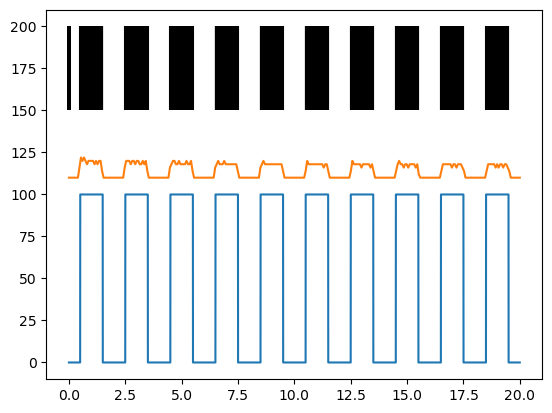

In [162]:
plt.plot(t,I)
plt.plot(tb,2*bc+110)
plt.vlines(t[np.argwhere(spikes>0)],150,200,'k')


# plt.xlim(14.45,15.15)

# spikes.shape, t.shape

In [41]:
# dt[0,0]# I[i-window:i]
# dt
I[i-window:i].shape,sta.shape

((1000, 1), (1000,))

In [86]:
#sta:
window = (1000e-3 / dt[0,0]).astype(int)
sta = np.zeros(window)

spike_indices = np.argwhere(spikes>0)
spike_count = np.count_nonzero(spike_indices>window)

for i in spike_indices[spike_indices>window]:
    sta += I[i-window:i,0]

sta /= spike_count
        



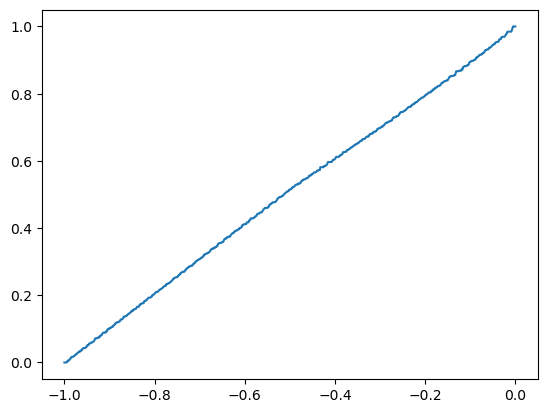

In [90]:
# plt.vlines(spike_indices,0,1)
tt = np.linspace(-1,0,1000)
plt.plot(tt,sta/100)

In [173]:
filt = np.sin(np.linspace(0,2*np.pi/4,100))
stim = np.random.randn(100000)
# plt.plot(stim)

# generate responses
resp = np.zeros_like(stim)
for i in range(len(filt),len(stim)):
    x = (filt * stim[i-len(filt):i]).sum()
    resp[i] = np.random.poisson(1/(1+np.exp(-x)))




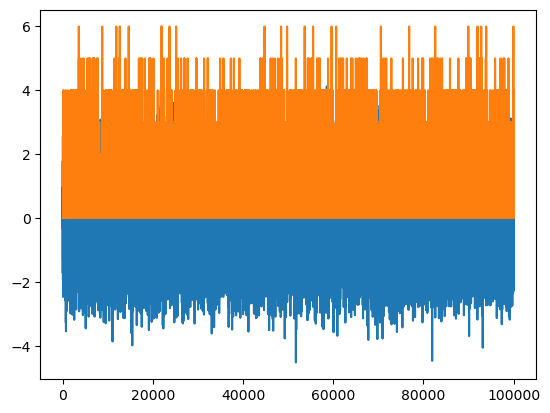

In [174]:
plt.plot(stim)
plt.plot(resp)
# plt.xlim([400,500])

In [175]:
#sta:
window = len(filt)
sta = np.zeros(window)

spike_indices = np.argwhere(resp>0.5)
spike_count = np.count_nonzero(spike_indices>window)

for i in spike_indices[spike_indices>window]:
    # sta += I[i-window:i,0]
    sta += stim[i-window:i]

sta /= spike_count
spike_count

33173

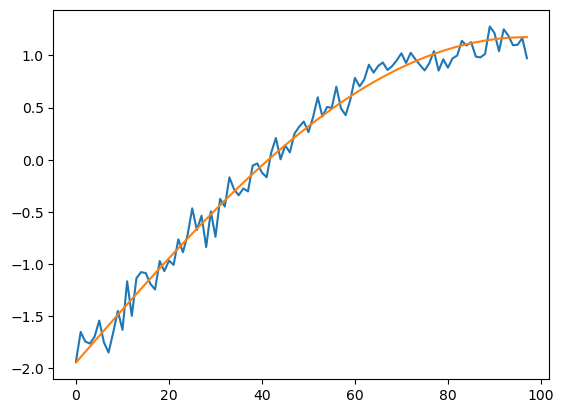

In [176]:
plt.plot((sta[2:] - sta.mean())/sta.std())
plt.plot((filt[2:] - filt.mean())/filt.std())